<a href="https://colab.research.google.com/github/Annie-jain/LGM_VIP-TASKS/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Iris Flowers Classification ML Project `**

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pwd


'/content'

# **Loading a dataset**


In [ ]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.shape

(150, 5)

## to display basic info about dataType

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# to display stats about data

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:

df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# to display no. of samples on each class

In [ ]:
df['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

# **Preprocessing of data**

# check for NULL VALUES

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
#total count of data
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [ ]:
df.groupby('species').size()


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# **Exploratory Data Analysis**

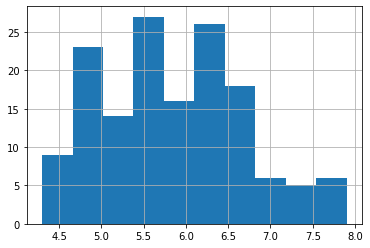

In [ ]:
#histograms
df['sepal_length'].hist()

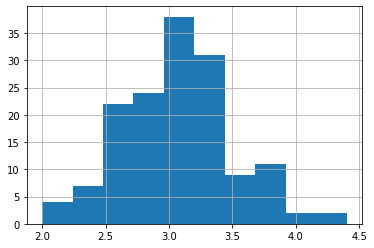

In [ ]:
df['sepal_width'].hist()

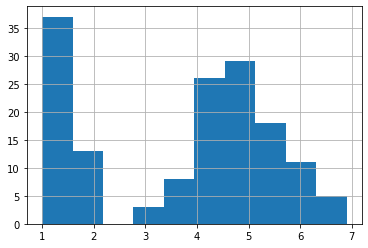

In [ ]:
df['petal_length'].hist()

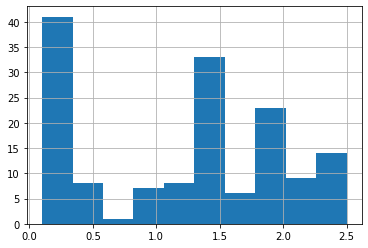

In [ ]:
df['petal_width'].hist()

# ScatterPLots

In [ ]:
colors = ['blue','green','red']
species =['Iris-virginica','Iris-setosa','Iris-versicolor'] 

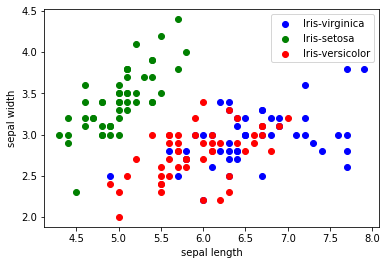

In [ ]:
for i in range(3):
  x =df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label= species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

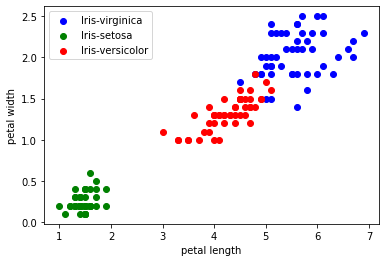

In [ ]:
for i in range(3):
  x =df[df['species'] == species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label= species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

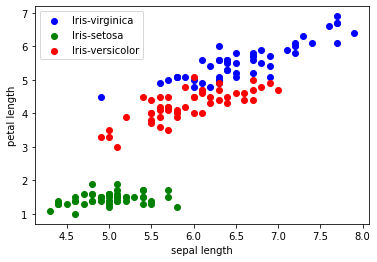

In [ ]:
for i in range(3):
  x =df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label= species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

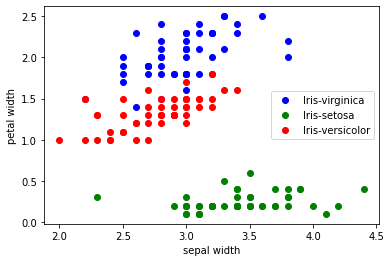

In [ ]:
for i in range(3):
  x =df[df['species'] == species[i]]
  plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label= species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()

# **Coorelation matrix**

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


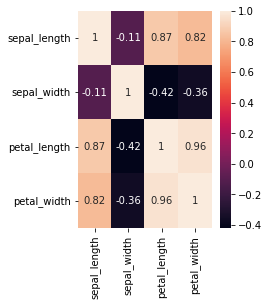

In [ ]:
corr=df.corr()
fig,ax =plt.subplots(figsize=(3,4))
sns.heatmap(corr,annot=True ,ax=ax)

# **Label encoder**

In [ ]:
#converting the labels into numeric data

from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()

In [ ]:
df['species']=le.fit_transform(df['species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **MODEL TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split
#train -70%data      #test - 30%
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
 

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Print metric to get performance 
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [ ]:
#knn -> k-nearrest neighbours
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()

In [ ]:
model1.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Print metric to get performance 
print("Accuracy: ", model1.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

In [ ]:
model2.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Print metric to get performance 
print("Accuracy: ", model2.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777
